Import libraries.

In [21]:
import pandas as p
from textblob import TextBlob
import matplotlib.pyplot as plot


Import pickled data.

In [3]:
# We'll start by reading in the corpus, which preserves word order
data = p.read_pickle('corpus.pkl')
#dtm = p.read_pickle('dtm.pkl')
#dtm = dtm.transpose()
data = data.set_index('speaker')
print(data)


                speaker                                           speeches  \
0            Tom Steyer  bernie sanders analysis is right the differenc...   
1   Marianne Williamson  thank you in  our founders brought forth on th...   
2         Kamala Harris  well first of all we have a criminal living in...   
3        Pete Buttigieg  we know what the president … what russia wants...   
4         Beto O’Rourke  you know i think about everyone whos ever serv...   
5      Elizabeth Warren  look the way i see this is that bernie is winn...   
6         Tulsi Gabbard  that our democratic party unfortunately is not...   
7         Julian Castro  not at all we can walk and chew gum at the sam...   
8           Cory Booker  well first of all i think we all agree that we...   
9             Joe Biden  we talk about progressive lets talk about bein...   
10       Bernie Sanders  well youre right the economy is doing really g...   
11          Andrew Yang  first let me say america its great to b

In [16]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
lambda_pol = lambda x: TextBlob(x).sentiment.polarity
lambda_sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data.speeches.apply(lambda_pol)
data['subjectivity'] = data.speeches.apply(lambda_sub)
data


,speaker,speeches,speaking_time,polarity,subjectivity
0,Tom Steyer,bernie sanders analysis is right the differenc...,3635.0,0.070846,0.403292
1,Marianne Williamson,thank you in our founders brought forth on th...,827.0,0.122903,0.436937
2,Kamala Harris,well first of all we have a criminal living in...,3999.0,0.098976,0.448969
3,Pete Buttigieg,we know what the president … what russia wants...,8413.0,0.113566,0.442240
4,Beto O’Rourke,you know i think about everyone whos ever serv...,2002.0,0.145501,0.449311
5,Elizabeth Warren,look the way i see this is that bernie is winn...,9339.0,0.121648,0.429378
6,Tulsi Gabbard,that our democratic party unfortunately is not...,1690.0,0.076924,0.473923
7,Julian Castro,not at all we can walk and chew gum at the sam...,1534.0,0.141159,0.467361
8,Cory Booker,well first of all i think we all agree that we...,3068.0,0.094028,0.446607
9,Joe Biden,we talk about progressive lets talk about bein...,9310.0,0.137961,0.459032


In [20]:
# Print each candidate's polarity and subjectivity in descending order.
print(data.drop('speeches', axis = 1).sort_values(by = 'polarity', ascending = False))
print(data.drop('speeches', axis = 1).sort_values(by = 'subjectivity', ascending = False))


                speaker  speaking_time  polarity  subjectivity
4         Beto O’Rourke         2002.0  0.145501      0.449311
13        Amy Klobuchar         7703.0  0.141558      0.420180
7         Julian Castro         1534.0  0.141159      0.467361
9             Joe Biden         9310.0  0.137961      0.459032
1   Marianne Williamson          827.0  0.122903      0.436937
5      Elizabeth Warren         9339.0  0.121648      0.429378
3        Pete Buttigieg         8413.0  0.113566      0.442240
12    Michael Bloomberg         1613.0  0.107497      0.443302
11          Andrew Yang         3149.0  0.106764      0.392223
10       Bernie Sanders         9389.0  0.099602      0.453790
2         Kamala Harris         3999.0  0.098976      0.448969
8           Cory Booker         3068.0  0.094028      0.446607
6         Tulsi Gabbard         1690.0  0.076924      0.473923
0            Tom Steyer         3635.0  0.070846      0.403292
                speaker  speaking_time  polarity  subje

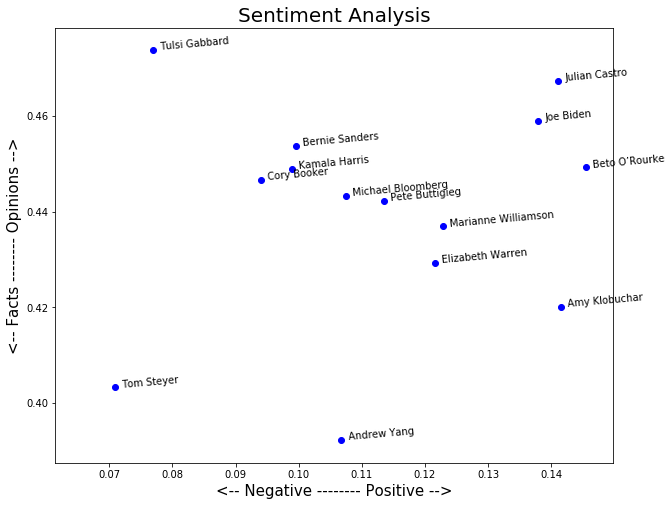

In [35]:
# Plot the subjectivity and sentiment!

plot.rcParams['figure.figsize'] = [10, 8]

for i, candidate in enumerate(data.index):
    x = data.polarity.loc[candidate]
    y = data.subjectivity.loc[candidate]
    plot.scatter(x, y, color = 'blue')
    plot.text(x + .001, y, candidate, fontsize = 10, rotation = 5)
plot.title('Sentiment Analysis', fontsize = 20)
plot.xlabel('<-- Negative -------- Positive -->', fontsize = 15)
plot.ylabel('<-- Facts -------- Opinions -->', fontsize = 15)
plot.show()


Some of these results surprised me!

    Polarity
Tom Steyer and Tulsi Gabbard weren't as positive as the other candidates;
Beto was the most positive.

    Subjectivity
Andrew Yang was an outlier--the most fact-based candidate (Of course!);
Tom Steyer is a close second.
Tulsi Gabbard was the most opinion-based candidate (perhaps because of her preoccupation with war?).

We can't conclude anything about gender's relation to subjectivity (or if there is one).  We would need a more diverse sample size to determine that.
